# Sentiment Analysis

We will now continue exploring our data, we will analyse how much of fact or opinion does our quotes have and if they are positive or negative expressions.

First we have to remember some things (this text extracted from https://github.com/adashofdata/nlp-in-python-tutorial):

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.



In [2]:
import pickle
filename = "corpus.pkl"
data = []
outfile = open(filename,'rb')
corpus = pickle.load(outfile)

In [3]:
from textblob import TextBlob
sentimental = []
for quote in corpus:
    aux = []
    aux.append(TextBlob(quote).sentiment.polarity)
    aux.append(TextBlob(quote).sentiment.subjectivity)
    sentimental.append(aux)

To explore some examples of how TextBlob works:

In [4]:
print("Word: "+corpus[14]+"\n")
print("How Positive it is? [MAX = +1]: "+str(TextBlob(corpus[14]).sentiment.polarity))
print("Is it a fact (0) or an opinion (1)?: "+str(TextBlob(corpus[14]).sentiment.subjectivity))


Word: when one door of happiness closes another opens but often we look so long at the closed door that we do not see the one which has been opened for us

How Positive it is? [MAX = +1]: 0.18333333333333332
Is it a fact (0) or an opinion (1)?: 0.23333333333333336


Lets plot it!

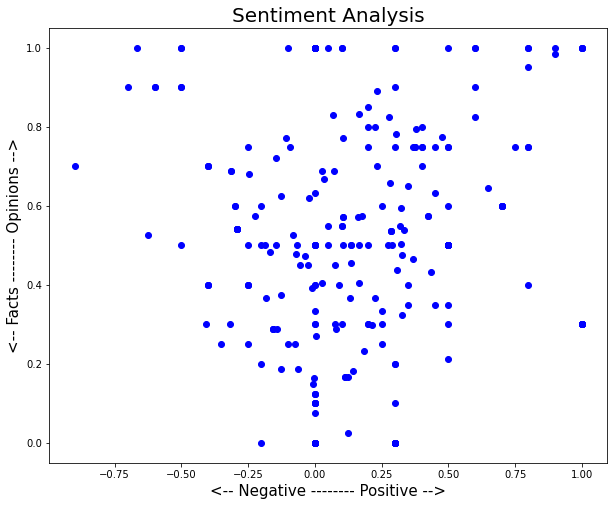

In [65]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for quote in sentimental:
    x = quote[0]
    y = quote[1]
    plt.scatter(x, y, color='blue')
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

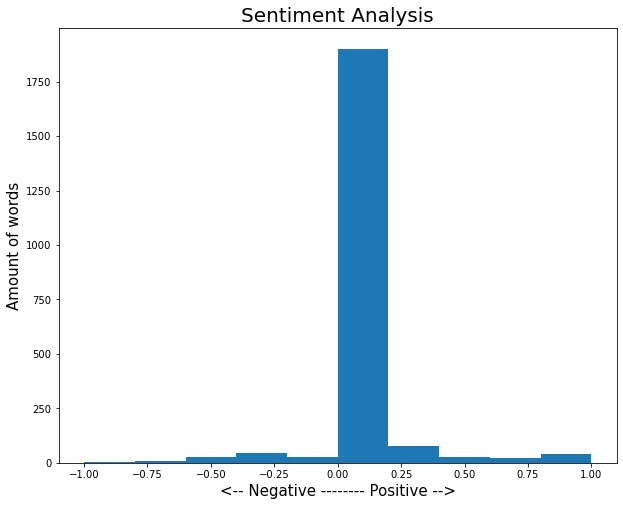

In [60]:
aux = []
for quote in sentimental:
    aux.append(quote[0])
plt.hist(aux)
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('Amount of words', fontsize=15)
plt.show()

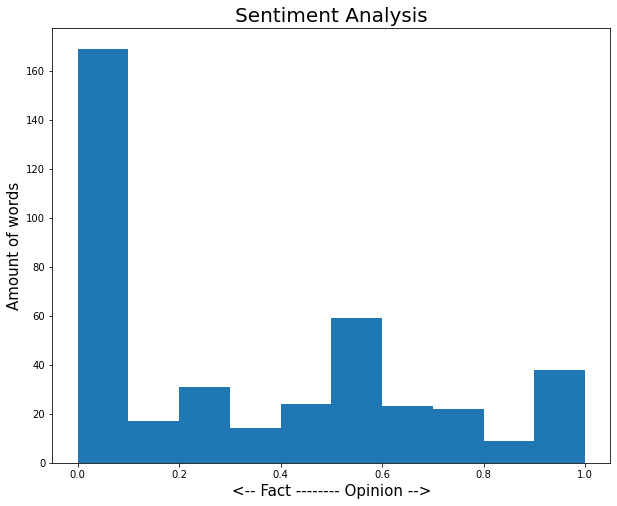

In [66]:
aux = []
for quote in sentimental:
    aux.append(quote[1])
plt.hist(aux)
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Fact -------- Opinion -->', fontsize=15)
plt.ylabel('Amount of words', fontsize=15)
plt.show()

Ok, after this sentiment analysis we have some conclusions.

**1.** ***Most quotes are either neutral or positive expressions***

**2.** ***Most quotes express facts rather than opinions***

Now I understand why I liked this quotes when I read it the first time... They inspire but they are not naive! Understanding *naive* as expressions full of opinions and positive expressions.